Optimization terminated successfully.
         Current function value: 4.797951
         Iterations: 11
         Function evaluations: 22


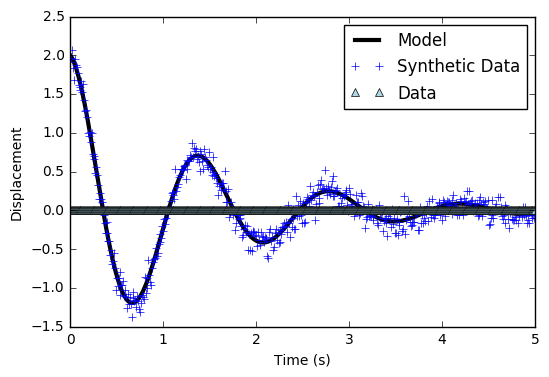

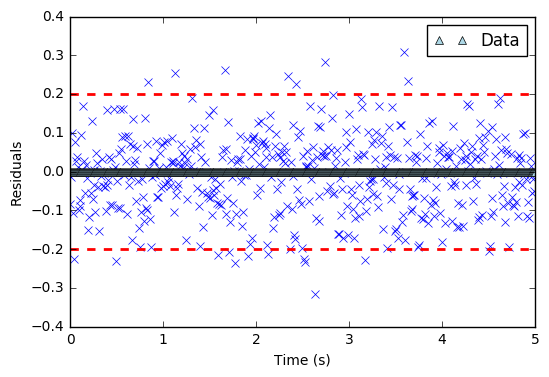

C:\Users\Marzieh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


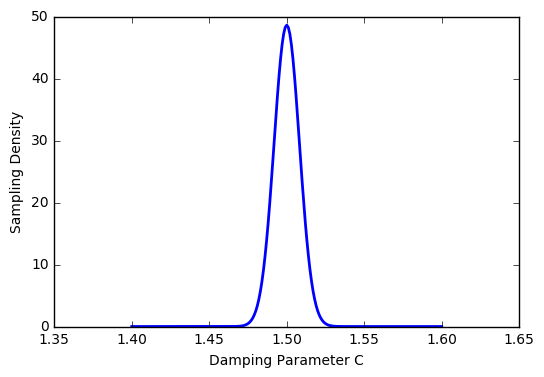

In [1]:
#                          Example7_15

# Construct synthetic data and sampling distribution for the damping
# parameter C as illustrated in Example 7.15.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import openturns as ot
#import math as m
#from scipy.optimize import minimize
import scipy.optimize

#Specify true parameter and measurement variance values.
m = 1
k = 20.5
c = 1.5
sigma = 0.1
var = sigma**2

#Construct synthetic data, sensitivity value, and covariance value V.
num = np.sqrt(4*m*k-c**2)
den = 2*m

        
t = np.array([x/100 for x in range(501)])
error = sigma*np.random.randn(t.size)
n = t.size

y = 2*np.exp((-c/den)*np.array(t))*np.cos((num/den)*np.array(t))
dydc = -(np.array(t)/m)*np.exp((-c/den)*np.array(t))*np.cos((num/den)*np.array(t))+(c*np.array(t)/(m*num))

A=dydc
D=np.matmul(A,A.T)
V=var*(1/D)
V=np.squeeze(V)
obs = y + error



##Construct sampling distribution and determine optimal value of C for this data.
C = np.array([x/1000 for x in range(1400,1601)])
sample_dist=mlab.normpdf(C,1.5,np.sqrt(V))


##==============================================================================
## modelfun = ot.SymbolicFunction(['cc','tt','kk'],['2*exp(-cc*tt/2)*cos(sqrt(kk-cc**2/4)*tt)'])
## print(modelfun[1,2,3])
##==============================================================================
##ot.ParametricFunction(modelfun, [0, 1, 2], [2.0, 1.0]).getMarginal(1).draw(0.0, 2.0)
#

def springfunc(c,m,k,obs,t):
   num = np.sqrt(4*m*k - c**2)
   den = 2*m
   yy = 2*np.exp((-c/den)*np.array(t))*np.cos((num/den)*np.array(t))
   yyy=yy-obs
   J=np.matmul(yyy,yyy.T)
   return J




f = lambda c,m,k,obs,t: springfunc(c,m,k,obs,t)
results= scipy.optimize.fmin(f,c,args=(m,k,obs,t,))


#  figure(1)
f = plt.figure()
plt.plot(t, y, 'k', label='Model', linewidth=3)
plt.plot(t, obs,'+b', label='Synthetic Data', linewidth=1)
plt.plot(t,0*np.array(y),'k^', linewidth=1,color='lightblue',label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Displacement')
plt.legend()
plt.show()
    

  
#  figure(2)
f = plt.figure()
plt.plot(t,error,'x',t,0*np.array(y),'k',linewidth=2)
plt.plot(t,2*sigma*np.ones(t.size),'--r', linewidth=2)
plt.plot(t,-2*sigma*np.ones(t.size),'--r', linewidth=2)
plt.plot(t,0*np.array(y),'k^', linewidth=1,color='lightblue',label='Data')
plt.xlabel('Time (s)')
plt.ylabel('Residuals')
plt.legend()
plt.show()





 #figure(3)
f = plt.figure()
plt.plot(C,sample_dist,linewidth=2)
plt.xlabel('Damping Parameter C')
plt.ylabel('Sampling Density')
plt.legend()
plt.show()